# Amsterdam temperature analysis 2019-12 -> 2025-08

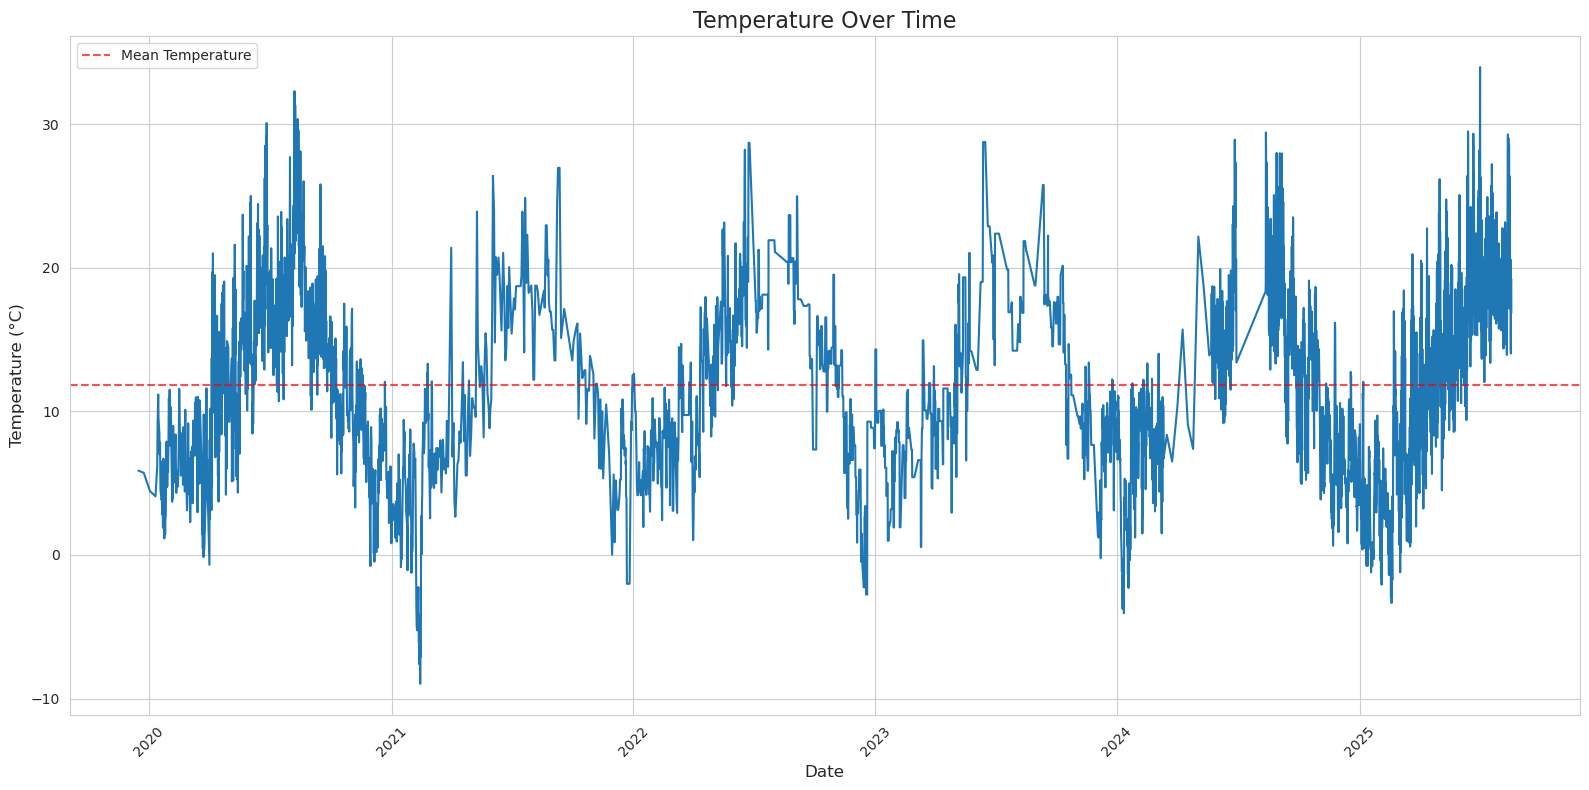

Data range: 2019-12-15 22:00:00+00:00 to 2025-08-17 22:41:39.360718+00:00
Temperature statistics:
count    950601.000000
mean         11.840727
std           6.316466
min          -9.000000
25%           7.230000
50%          11.300000
75%          16.730000
max          35.360000
Name: temperature, dtype: float64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for the plot
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

# Load the data
csv_file = "/mnt/hd/datasets/temperature/temperature.csv"
df = pd.read_csv(csv_file)

# Convert timestamps to UTC explicitly
df['timestamp'] = pd.to_datetime(df['timestamp'], format='ISO8601', utc=True)

# Sort by timestamp to ensure chronological order
df = df.sort_values('timestamp')

# OPTION 2: Downsample by taking every Nth point (more reliable with large datasets)
N = max(1, len(df) // 5000)  # Adjust to control number of points
plot_data = df.iloc[::N].copy()

# Plot with Seaborn
sns.lineplot(x='timestamp', y='temperature', data=plot_data, linewidth=1.5)

# Enhance the plot
plt.title('Temperature Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Add some extra information
plt.axhline(
    y=df['temperature'].mean(),
    color='r',
    linestyle='--',
    alpha=0.7,
    label='Mean Temperature',
)
plt.legend()

# Show the plot
plt.show()

# Optional: Display some statistics
print(f"Data range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Temperature statistics:\n{df['temperature'].describe()}")